<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Introduction</a></span></li><li><span><a href="#2.Analyse-en-Composantes-Principales-(PCA)" data-toc-modified-id="2.Analyse-en-Composantes-Principales-(PCA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2.Analyse en Composantes Principales (PCA)</a></span></li><li><span><a href="#Exemples" data-toc-modified-id="Exemples-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exemples</a></span></li><li><span><a href="#2.-Le-Clustering-(regroupement)" data-toc-modified-id="2.-Le-Clustering-(regroupement)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>2. Le Clustering (regroupement)</a></span></li><li><span><a href="#Choisir-le-nombre-de-clusters-pour-K-means" data-toc-modified-id="Choisir-le-nombre-de-clusters-pour-K-means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Choisir le nombre de clusters pour K-means</a></span></li><li><span><a href="#Propagation-des-affinités" data-toc-modified-id="Propagation-des-affinités-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Propagation des affinités</a></span></li><li><span><a href="#Regroupement-spectral" data-toc-modified-id="Regroupement-spectral-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Regroupement spectral</a></span></li><li><span><a href="#Regroupement-agglomératif" data-toc-modified-id="Regroupement-agglomératif-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Regroupement agglomératif</a></span></li><li><span><a href="#Métriques-d'Accuracy" data-toc-modified-id="Métriques-d'Accuracy-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Métriques d'Accuracy</a></span></li><li><span><a href="#5.-Ressources-utiles" data-toc-modified-id="5.-Ressources-utiles-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>5. Ressources utiles</a></span></li></ul></div>

![](https://nixustechnologies.com/wp-content/uploads/2022/03/unsupervised-machine-learning-1.webp)

# <center>5. Unsupervised learning: Dimension Reduction and clustering

Bienvenu dans la 5eme leçon de notre cours de Machine Learning
  
 
Dans cette leçon, nous travaillerons avec des méthodes d'apprentissage non supervisé telles que l'analyse en composantes principales (ACP) et le regroupement. Vous apprendrez pourquoi et comment nous pouvons réduire la dimensionnalité des données d'origine et quelles sont les principales approches pour regrouper des points de données similaires. 

### Aperçu de l'article
1. [Introduction](#1.-Introduction)
2. [PCA](#2.-Principal-Component-Analysis-(PCA))
 - Intuition, théories et questions d'application](#Intuition,-théories,-et-questions-d'application)
 - Exemples](#Exemples)
3. [Clustering](#2.-Clustering)
 - K-means](#K-means)
 - Propagation par affinité](#Propagation par affinité)
 - [Regroupement spectral](#Regroupement spectral)
 - [Regroupement agglomératif](#Regroupementagglomératif)
 - Mesures d'exactitude](#Mesures d'exactitude)
4. [Démonstration](#4.-Démo-affectation)
5. [Ressources utiles](#5.-Ressources-utiles)


## 1. Introduction

La principale caractéristique des algorithmes d'apprentissage non supervisé, par rapport aux méthodes de classification et de régression, est que les données d'entrée ne sont pas étiquetées (c'est-à-dire qu'aucune étiquette ou classe n'est donnée) et que l'algorithme apprend la structure des données sans aucune aide. Cela crée deux différences principales. Premièrement, cela nous permet de traiter de grandes quantités de données parce qu'il n'est pas nécessaire de les étiqueter manuellement. Deuxièmement, il est difficile d'évaluer la qualité d'un algorithme non supervisé en raison de l'absence d'une mesure de qualité explicite telle que celle utilisée dans l'apprentissage supervisé.  

L'une des tâches les plus courantes de l'apprentissage non supervisé est la réduction de la dimensionnalité. D'une part, la réduction de la dimensionnalité peut aider à la visualisation des données (par exemple, la méthode t-SNE) et, d'autre part, elle peut aider à traiter la multicolinéarité de vos données et à préparer les données pour une méthode d'apprentissage supervisé (par exemple, les arbres de décision).


## 2.Analyse en Composantes Principales (PCA)

### Intuition, théories, et problèmes d'application

L'analyse en composantes principales est l'une des méthodes les plus simples, les plus intuitives et les plus fréquemment utilisées pour réduire la dimensionnalité, en projetant les données sur leur sous-espace orthogonal.


<img align="right" src="https://habrastorage.org/getpro/habr/post_images/bb6/fe7/f06/bb6fe7f06e114bcc9c354a1cb025b966.png" width="400">


De manière plus générale, toutes les observations peuvent être considérées comme un ellipsoïde dans un sous-espace d'un espace de caractéristiques initial, et le nouvel ensemble de bases dans ce sous-espace est aligné sur les axes de l'ellipsoïde. Cette hypothèse nous permet d'éliminer les caractéristiques fortement corrélées puisque les vecteurs de l'ensemble de base sont orthogonaux. 
Dans le cas général, la dimensionnalité de l'ellipsoïde qui en résulte correspond à la dimensionnalité de l'espace initial, mais l'hypothèse selon laquelle nos données se trouvent dans un sous-espace de dimension inférieure nous permet de couper l'espace "excessif" à l'aide de la nouvelle projection (sous-espace). Nous y parvenons de manière "gourmande", en sélectionnant séquentiellement chacun des axes de l'ellipsoïde en identifiant l'endroit où la dispersion est maximale.
 
 

> "Pour traiter les hyperplans dans un espace à 14 dimensions, visualisez un espace en 3D et dites "quatorze" très fort. Tout le monde le fait. - Geoffrey Hinton


Examinons la formulation mathématique de ce processus :

Afin de réduire la dimensionnalité de nos données de $n$ à $k$ avec $k \leq n$, nous trions notre liste d'axes par ordre de dispersion décroissante et prenons les $k$ supérieurs.

Nous commençons par calculer la dispersion et la covariance des caractéristiques initiales. Cela se fait généralement à l'aide de la matrice de covariance. Selon la définition de la covariance, la covariance de deux caractéristiques est calculée comme suit : $$cov(X_i, X_j) = E[(X_i - \mu_i) (X_j - \mu_j)] = E[X_i X_j] - \mu_i \mu_j,$$ où $\mu_i$ est l'espérance de la $i$ème caractéristique. Il convient de noter que la covariance est symétrique et que la covariance d'un vecteur avec lui-même est égale à sa variance (dispersion).
    
La matrice de covariance est donc symétrique, la dispersion des caractéristiques correspondantes se trouvant sur la diagonale. Les valeurs non diagonales sont les covariances de la paire de caractéristiques correspondante. En termes de matrices où $\mathbf{X}$ est la matrice des observations, la matrice de covariance est la suivante :

$$\Sigma = E[(\mathbf{X} - E[\mathbf{X}]) (\mathbf{X} - E[\mathbf{X}])^{T}]$$

Rappel rapide : les matrices, en tant qu'opérateurs linéaires, ont des valeurs propres et des vecteurs propres. Ils sont très pratiques car ils décrivent des parties de notre espace qui ne tournent pas et ne s'étirent que lorsque nous leur appliquons des opérateurs linéaires ; les vecteurs propres restent dans la même direction mais sont étirés par une valeur propre correspondante. Formellement, une matrice $M$ avec un vecteur propre $w_i$ et une valeur propre $\lambda_i$ satisfait cette équation : $M w_i = \lambda_i w_i$.

La matrice de covariance d'un échantillon $\mathbf{X}$ peut être écrite comme un produit de $\mathbf{X}^{T} \mathbf{X}$. Selon le [quotient de Rayleigh] (https://en.wikipedia.org/wiki/Rayleigh_quotient), la variation maximale de notre échantillon se situe le long du vecteur propre de cette matrice et correspond à la valeur propre maximale. Par conséquent, les composantes principales que nous voulons retenir des données sont simplement les vecteurs propres correspondant aux k$$ plus grandes valeurs propres de la matrice.

Les étapes suivantes sont plus faciles à assimiler. Nous multiplions la matrice de nos données $X$ par ces composantes pour obtenir la projection de nos données sur la base orthogonale des composantes choisies. Si le nombre de composantes est inférieur à la dimensionnalité de l'espace initial, il faut se rappeler que nous perdrons certaines informations en appliquant cette transformation.

## Exemples
### Jeu de données iris de Fisher

Commençons par télécharger tous les modules essentiels et essayons l'exemple iris de la documentation `scikit-learn`.  

In [35]:
import warnings
warnings.filterwarnings("ignore")

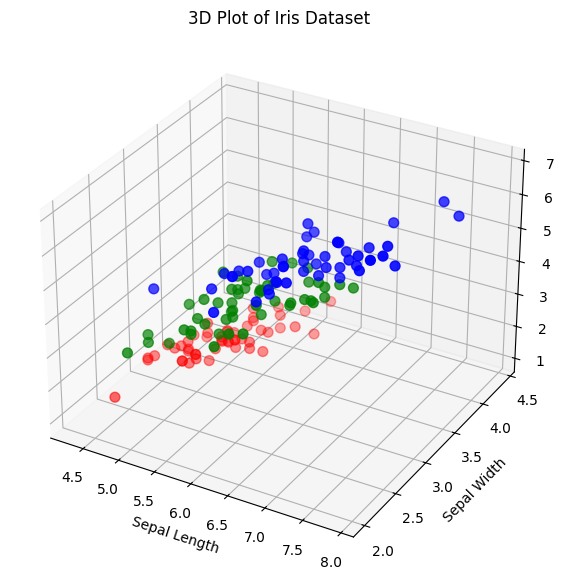

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Ensure plots are displayed inline in Jupyter notebooks
# %matplotlib inline

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Map species to colors
color_map = {'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}
iris['color'] = iris['species'].map(color_map)

# Create a figure for 3D plotting with increased figure size
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data with increased point size
ax.scatter(iris['sepal_length'], iris['sepal_width'], iris['petal_length'], c=iris['color'], s=50)

# Customize the plot
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Plot of Iris Dataset')

# Show the plot
plt.show()

Voyons maintenant comment l'ACP peut améliorer les résultats d'un modèle simple qui n'est pas en mesure de s'adapter correctement à toutes les données d'apprentissage :

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder


X = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values
y = iris['species'].values

le = LabelEncoder()
y = le.fit_transform(y)

# Train, test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

# Decision trees with depth = 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

Accuracy: 0.88889


Let's try this again, but, this time, let's reduce the dimensionality to 2 dimensions:

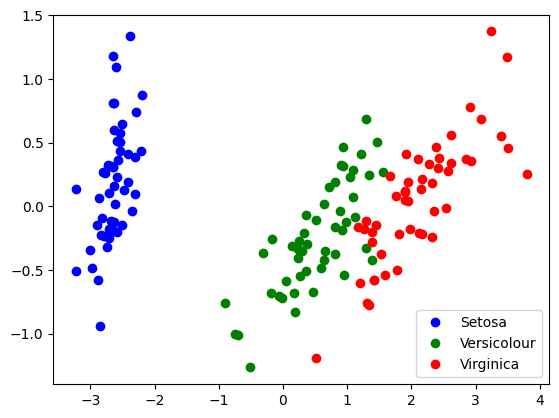

In [21]:
# Using PCA from sklearn PCA
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# Plotting the results of PCA
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0);

In [22]:
# Test-train split and apply PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

Accuracy: 0.91111


La précision n'a pas augmenté de manière significative dans ce cas, mais avec d'autres ensembles de données comportant un grand nombre de dimensions, l'ACP peut améliorer considérablement la précision des arbres de décision et d'autres méthodes d'ensemble.

Vérifions maintenant le pourcentage de variance qui peut être expliqué par chacune des composantes sélectionnées.

In [23]:
for i, component in enumerate(pca.components_):
    print("{} composante: {}% variance initiale".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.columns[:-1])))

1 composante: 92.46% variance initiale
0.361 x sepal_length + -0.085 x sepal_width + 0.857 x petal_length + 0.358 x petal_width
2 composante: 5.31% variance initiale
0.657 x sepal_length + 0.730 x sepal_width + -0.173 x petal_length + -0.075 x petal_width


### Ensemble de données sur les chiffres manuscrits 

Examinons l'ensemble de données sur les chiffres manuscrits, sur lequel vous pouvez trouver plus d'informations [ici](https://habrahabr.ru/company/ods/blog/322534/#derevya-resheniy-i-metod-blizhayshih-sosedey-v-zadache-raspoznavaniya-rukopisnyh-cifr-mnist).

In [24]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

Commençons par visualiser nos données. Récupérez les 10 premiers nombres. Les nombres sont représentés par des matrices 8 x 8 avec l'intensité de la couleur pour chaque pixel. Chaque matrice est aplatie en un vecteur de 64 nombres, ce qui nous permet d'obtenir la version caractéristique des données.

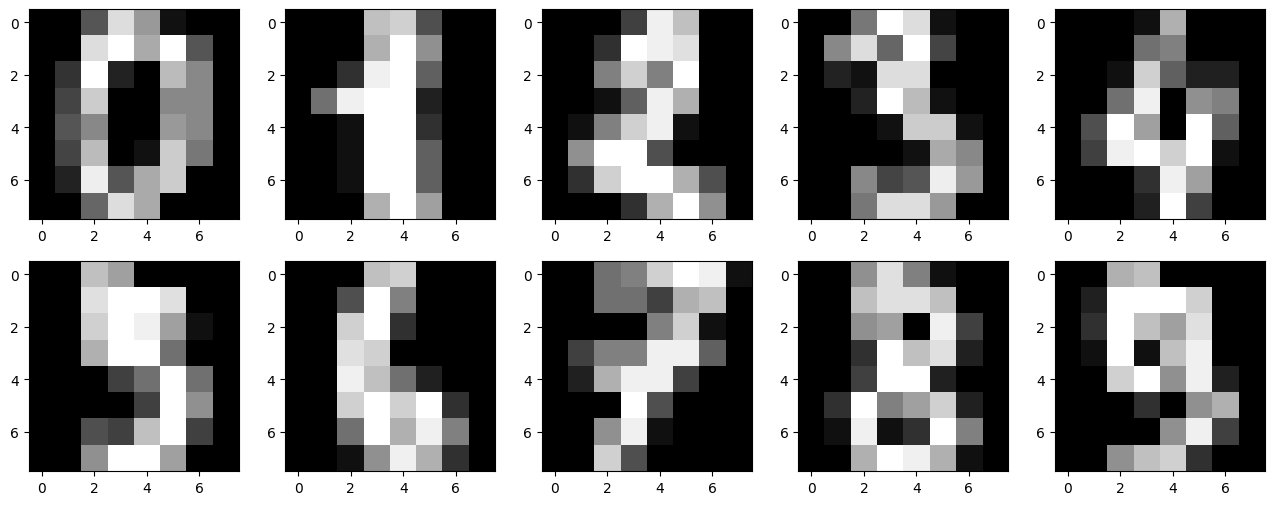

In [25]:
# f, axes = plt.subplots(5, 2, sharey=True, figsize=(16,6))
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray');

Nos données ont 64 dimensions, mais nous allons les réduire à seulement 2 et voir que, même avec seulement 2 dimensions, nous pouvons clairement voir que les chiffres se séparent en groupes.

Projecting 64-dimensional data to 2D


/tmp/ipykernel_6183/2187305149.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


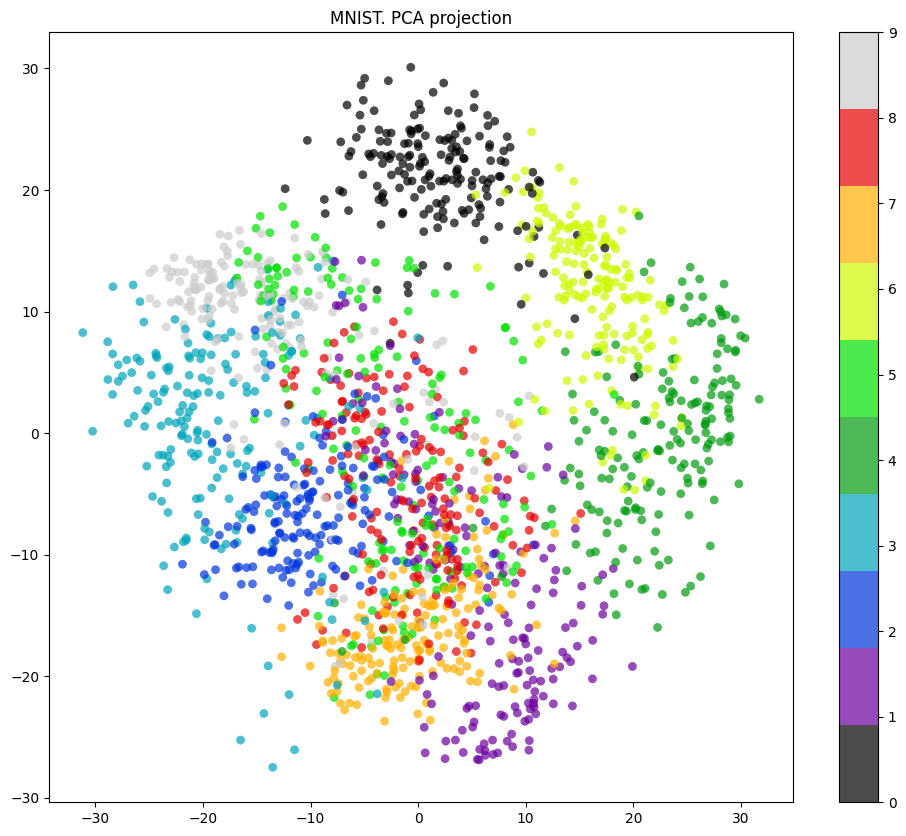

In [26]:
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

En effet, avec le t-SNE, la situation semble meilleure puisque l'ACP a une contrainte linéaire alors que le t-SNE n'en a pas. Cependant, même avec un si petit ensemble de données, l'algorithme t-SNE prend beaucoup plus de temps que l'ACP.

<timed exec>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.


CPU times: user 37.3 s, sys: 488 ms, total: 37.8 s
Wall time: 5.79 s


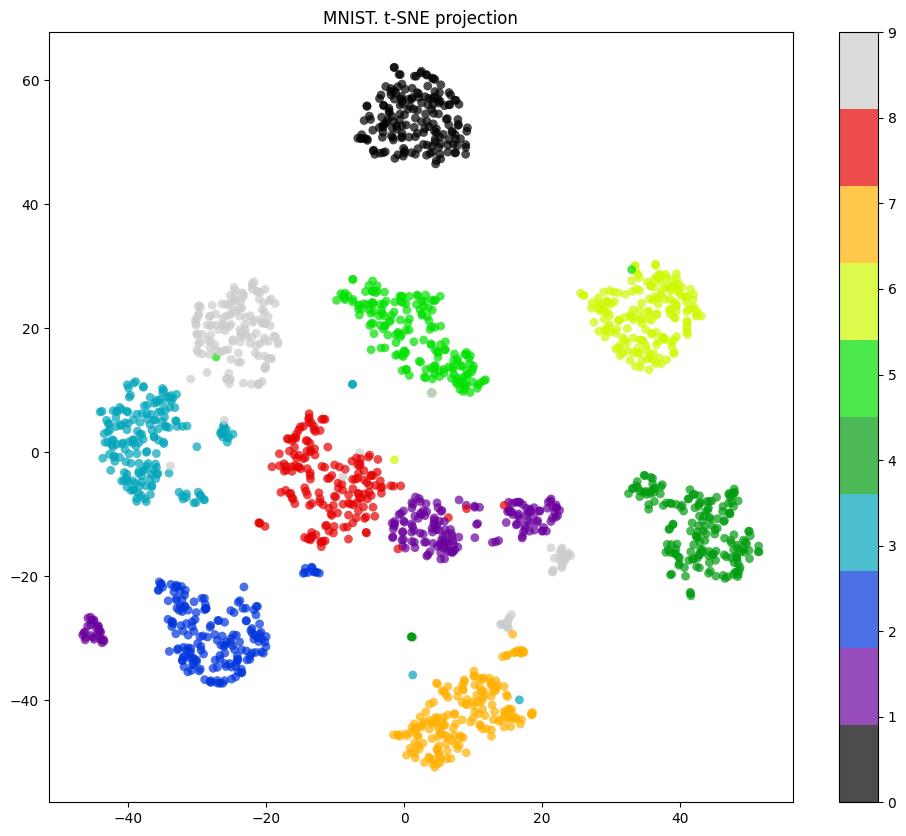

In [27]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection');

En pratique, nous choisissons le nombre de composantes principales de manière à pouvoir expliquer 90% de la dispersion initiale des données (via le `explained_variance_ratio`). Dans le cas présent, cela signifie qu'il faut retenir 21 composantes principales ; nous réduisons donc la dimensionnalité de 64 caractéristiques à 21.

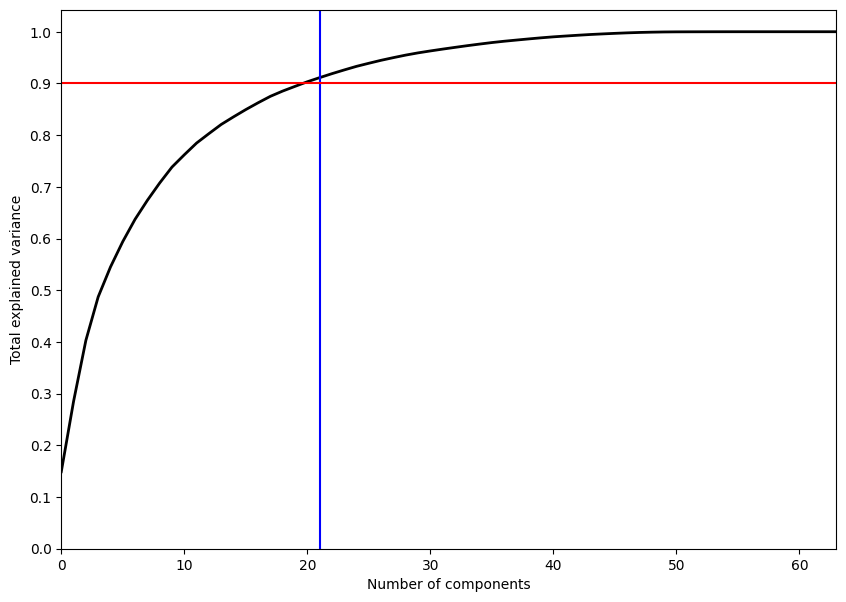

In [29]:
import numpy as np
pca = decomposition.PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show();

## 2. Le Clustering (regroupement)

L'idée principale du clustering est assez simple. En gros, nous nous disons : "J'ai ces points ici, et je peux voir qu'ils s'organisent en groupes. Ce serait bien de décrire ces choses plus concrètement et, lorsqu'un nouveau point arrive, de l'affecter au bon groupe." Cette idée générale encourage l'exploration et ouvre la voie à une variété d'algorithmes de clustering.

<figure><img align="center" src="https://habrastorage.org/getpro/habr/post_images/8b9/ae5/586/8b9ae55861f22a2809e8b3a00ef815ad.png"><figcaption>*Les exemples de résultats de différents algorithmes de scikit-learn*</figcaption></figure>

Les algorithmes énumérés ci-dessous ne couvrent pas toutes les méthodes de clustering existantes, mais ce sont les plus couramment utilisées.

### K-Means (K-Moyennes)

L'algorithme des K-Means est le plus populaire et le plus simple de tous les algorithmes de clustering. Voici comment il fonctionne :
1. Sélectionnez le nombre de clusters $k$ qui vous semble optimal.
2. Initialiser $k$ points comme "centroïdes" au hasard dans l'espace de nos données.
3. Attribuez chaque observation à son centroïde le plus proche.
4. Mettre à jour les centroïdes au centre de tous les ensembles d'observations attribués. 
5. Répéter les étapes 3 et 4 un nombre fixe de fois ou jusqu'à ce que tous les centroïdes soient stables (c'est-à-dire qu'ils ne changent plus à l'étape 4).

Cet algorithme est facile à décrire et à visualiser. Jetons un coup d'œil.

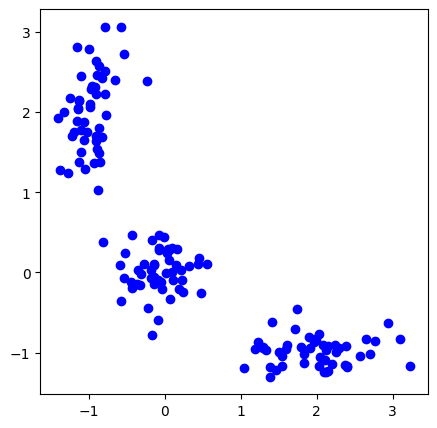

In [30]:
# Let's begin by allocation 3 cluster's points
X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo');

In [31]:
# Scipy has function that takes 2 tuples and return
# calculated distance between them
from scipy.spatial.distance import cdist

# Randomly allocate the 3 centroids 
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

for i in range(3):
    # Calculating the distance from a point to a centroid
    distances = cdist(X, centroids)
    # Checking what's the closest centroid for the point
    labels = distances.argmin(axis=1)
    
    # Labeling the point according the point's distance
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)
    
    cent_history.append(centroids)

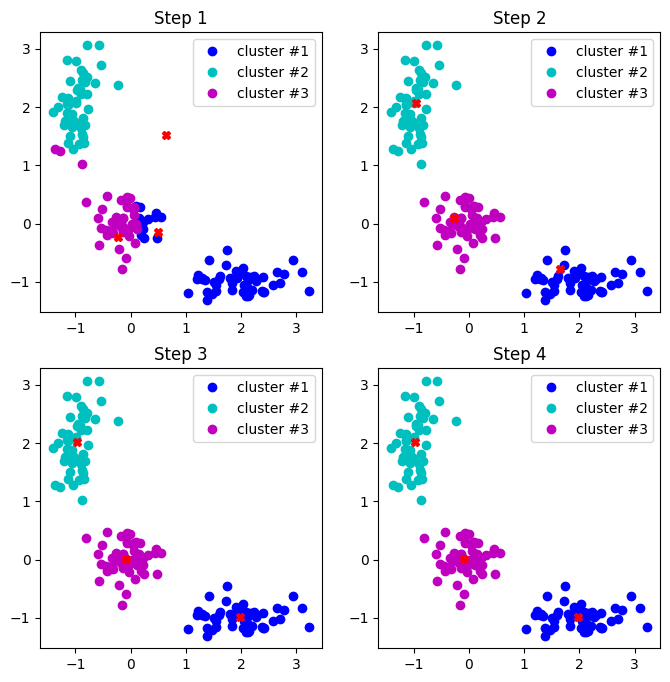

In [32]:
# Let's plot K-means
plt.figure(figsize=(8, 8))
for i in range(4):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)
    
    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Step {:}'.format(i + 1));

Ici, nous avons utilisé la distance euclidienne, mais l'algorithme convergera avec n'importe quelle autre mesure. Vous pouvez non seulement varier le nombre d'étapes ou les critères de convergence, mais aussi la mesure de la distance entre les points et les centroïdes du cluster.

Une autre "caractéristique" de cet algorithme est sa sensibilité aux positions initiales des centroïdes des clusters. Vous pouvez exécuter l'algorithme plusieurs fois et ensuite faire la moyenne de tous les résultats des centroïdes.

## Choisir le nombre de clusters pour K-means

Contrairement aux tâches d'apprentissage supervisées telles que la classification et la régression, le clustering nécessite plus d'efforts pour choisir le critère d'optimisation. Habituellement, lorsque l'on travaille avec les k-means, on optimise la somme des distances quadratiques entre les observations et leurs centroïdes.

$$\Large J(C) = \sum_{k=1}^K\sum_{i~\in~C_k} ||x_i - \mu_k|| \rightarrow \min\limits_C,$$

où $C$ - est un ensemble de clusters avec une puissance de $K$, $\mu_k$ est un centroïde d'un cluster $C_k$.

Cette définition semble raisonnable : nous voulons que nos observations soient aussi proches que possible de leurs centroïdes. Mais il y a un problème : l'optimum est atteint lorsque le nombre de centroïdes est égal au nombre d'observations, ce qui signifie que chaque observation constituerait un groupe distinct.

Afin d'éviter ce cas, nous devrions choisir un nombre de clusters après lequel une fonction $J(C_k)$ diminue moins rapidement. Plus formellement,
$$\Large D(k) = \frac{|J(C_k) - J(C_{k+1})|}{|J(C_{k-1}) - J(C_k)|}  \rightarrow \min\limits_k $$

Prenons un exemple.

In [33]:
from sklearn.cluster import KMeans

In [36]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))


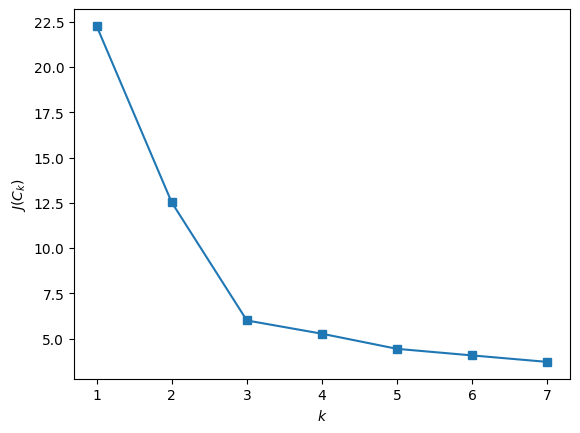

In [37]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

Nous voyons que $J(C_k)$ diminue de manière significative jusqu'à ce que le nombre de clusters soit de 3, puis ne change plus autant. Cela signifie que le nombre optimal de clusters est de 3. 

#### Problèmes

Intrinsèquement, K-means est NP-hard. Pour $d$ dimensions, $k$ clusters, et $n$ observations, nous trouverons une solution en $O(n^{d k+1})$ temps. Il existe quelques heuristiques pour résoudre ce problème ; un exemple est le MiniBatch K-means, qui prend des portions (lots) de données au lieu d'ajuster l'ensemble des données et déplace ensuite les centroïdes en prenant la moyenne des étapes précédentes. Comparez l'implémentation de K-means et de MiniBatch K-means dans la [documentation sckit-learn](http://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html).

L'[implémentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) de l'algorithme en utilisant `scikit-learn` a ses avantages tels que la possibilité d'indiquer le nombre d'initialisations avec le paramètre de la fonction `n_init`, ce qui nous permet d'identifier des centroïdes plus robustes. De plus, ces exécutions peuvent être effectuées en parallèle afin de réduire le temps de calcul.

## Propagation des affinités

La propagation des affinités est un autre exemple d'algorithme de regroupement. Contrairement aux K-means, cette approche ne nécessite pas de fixer au préalable le nombre de clusters. L'idée principale est de regrouper nos données en fonction de la similarité des observations (ou de la façon dont elles "correspondent" les unes aux autres).

Définissons une métrique de similarité telle que $s(x_i, x_j) > s(x_i, x_k)$ si une observation $x_i$ est plus similaire à l'observation $x_j$ et moins similaire à l'observation $x_k$. Un exemple simple d'une telle métrique de similarité est le carré négatif de la distance $s(x_i, x_j) = - ||x_i - x_j|^{2}$.


Décrivons maintenant la "correspondance" en créant deux matrices nulles. L'une d'entre elles, $r_{i,k}$, détermine dans quelle mesure la $k$eme observation est un "modèle de rôle" pour la $i$eme observation par rapport à tous les autres "modèles de rôle" possibles. Une autre matrice, $a_{i,k}$, détermine dans quelle mesure il serait approprié pour la $i$eme observation de prendre la $k$eme observation comme "modèle de rôle". Cela peut sembler déroutant, mais cela devient plus compréhensible avec un peu de pratique.

Les matrices sont mises à jour séquentiellement selon les règles suivantes :

$$r_{i,k} \leftarrow s_(x_i, x_k) - \max_{k' \neq k} \left\{ a_{i,k'} + s(x_i, x_k') \right\}$$

$$a_{i,k} \leftarrow \min \left( 0, r_{k,k} + \sum_{i' \not\in \{i,k\}} \max(0, r_{i',k}) \right), \ \ \  i \neq k$$

$$a_{k,k} \leftarrow \sum_{i' \neq k} \max(0, r_{i',k})$$

## Regroupement spectral

Le regroupement spectral combine certaines des approches décrites ci-dessus pour créer une méthode de regroupement plus solide.

Tout d'abord, cet algorithme exige que nous définissions la matrice de similarité pour les observations, appelée matrice d'adjacence. Cela peut se faire de la même manière que dans l'algorithme de propagation des affinités : $A_{i, j} = - ||x_i - x_j|^{2}$. Cette matrice décrit un graphe complet avec les observations comme sommets et la valeur de similarité estimée entre une paire d'observations comme poids des arêtes pour cette paire de sommets. Pour la métrique définie ci-dessus et les observations bidimensionnelles, c'est assez intuitif : deux observations sont similaires si l'arrête qui les relie est plus courte. 
Nous aimerions diviser le graphe en deux sous-graphes de manière à ce que chaque observation de chaque sous-graphe soit similaire à une autre observation de ce sous-graphe. Formellement, il s'agit d'un problème de coupes normalisées ; pour plus de détails, nous vous recommandons de lire [cet article](http://people.eecs.berkeley.edu/~malik/papers/SM-ncut.pdf).

## Regroupement agglomératif

L'algorithme suivant est le plus simple et le plus facile à comprendre parmi tous les algorithmes de regroupement sans nombre fixe de clusters.


L'algorithme est relativement simple :
1. Nous commençons par assigner chaque observation à son propre cluster.
2. Nous trions ensuite les distances par paire entre les centres des clusters dans l'ordre décroissant.
3. Nous prenons les deux clusters les plus proches et les fusionnons, puis nous recalculons les centres.
4. Répétez les étapes 2 et 3 jusqu'à ce que toutes les données soient fusionnées en un seule cluster.

Le processus de recherche du cluster le plus proche peut être mené à l'aide de différentes méthodes de délimitation des observations :
1. Liaison simple 
d(C_i, C_j) = min_{x_i \in C_i, x_j \in C_j} |x_i - x_j||$
2. Lien complet 
$d(C_i, C_j) = max_{x_i \in C_i, x_j \in C_j} |x_i - x_j||$
3. Lien moyen 
$d(C_i, C_j) = \frac{1}{n_i n_j} \sum_{x_i \in C_i} \sum_{x_j \in C_j} ||x_i - x_j||$
4. Lien avec le centroïde 
$d(C_i, C_j) = ||\mu_i - \mu_j||$

La troisième méthode est la plus efficace en termes de temps de calcul, car elle ne nécessite pas de recalculer les distances à chaque fois que les clusters sont fusionnées.

Les résultats peuvent être visualisés sous la forme d'un bel arbre à clusters (dendogramme) pour aider à reconnaître le moment où l'algorithme doit être arrêté pour obtenir des résultats optimaux. Il existe de nombreux outils Python pour construire ces dendogrammes pour le clustering agglomératif.

Prenons un exemple avec les clusters obtenus par K-means : 

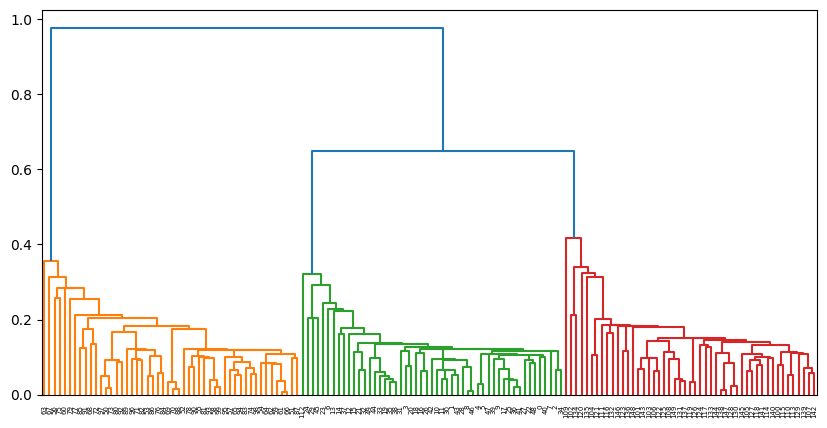

In [38]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

# pdist will calculate the upper triangle of the pairwise distance matrix
distance_mat = pdist(X) 
# linkage — is an implementation if agglomerative algorithm
Z = hierarchy.linkage(distance_mat, 'single')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

## Métriques d'Accuracy

Contrairement à la classification, il est difficile d'évaluer la qualité des résultats du regroupement. Dans ce cas, une métrique ne peut pas dépendre des étiquettes, mais uniquement de la qualité de la division. Deuxièmement, nous ne disposons généralement pas des véritables étiquettes des observations lorsque nous utilisons le regroupement.

Il existe des mesures de qualité *interne* et *externe*. Les mesures externes utilisent les informations sur la vraie répartition connue, tandis que les mesures internes n'utilisent aucune information externe et évaluent la qualité des clusters en se basant uniquement sur les données initiales. Le nombre optimal de clusters est généralement défini par rapport à certaines mesures internes. 

Toutes les métriques décrites ci-dessous sont implémentées dans `sklearn.metrics`.

**Adjusted Rand Index (ARI)**

Nous supposons ici que les véritables étiquettes des objets sont connues. Cette métrique ne dépend pas des valeurs des étiquettes mais de la répartition des données. Soit $N$ le nombre d'observations dans un échantillon. Soit $a$ le nombre de paires d'observations ayant les mêmes étiquettes et situées dans le même cluster, et $b$ le nombre d'observations ayant des étiquettes différentes et situées dans des clusters différents. L'indice de Rand peut être calculé à l'aide de la formule suivante : 

$$\Large \text{RI} = \frac{2(a + b)}{n(n-1)}.$$ 

En d'autres termes, il évalue une proportion d'observations pour lesquelles ces divisions (résultat initial et résultat du regroupement) sont cohérentes. L'indice de Rand (IR) évalue la similarité des deux divisions d'un même échantillon. Pour que cet indice soit proche de zéro pour n'importe quel résultat de regroupement avec n'importe quel $n$ et n'importe quel nombre de regroupements, il est essentiel de le mettre à l'échelle, d'où l'indice de Rand ajusté :  

$$\Large \text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}.$$

Cette métrique est symétrique et ne dépend pas de la permutation des étiquettes. Par conséquent, cet indice est une mesure des distances entre les différentes divisions de l'échantillon. $\text{ARI}$ prend des valeurs dans l'intervalle $[-1, 1]$. Les valeurs négatives indiquent l'indépendance des divisions, et les valeurs positives indiquent que ces divisions sont cohérentes (elles correspondent à $\text{ARI} = 1$).

**Adjusted Mutual Information (AMI)**

Cette métrique est similaire à $\text{ARI}$. Elle est également symétrique et ne dépend pas des valeurs et permutations des étiquettes. Elle est définie par la fonction [entropie](https://en.wikipedia.org/wiki/Entropy_(information_theory)) et interprète un échantillon divisé comme une distribution discrète (la probabilité d'affectation à un groupe est égale au pourcentage d'objets qu'il contient). L'indice $MI$ est défini comme l'[information mutuelle](https://en.wikipedia.org/wiki/Mutual_information) pour deux distributions, correspondant à l'échantillon divisé en clusters. Intuitivement, l'information mutuelle mesure la part d'information commune aux deux répartitions en clusters, c'est-à-dire la façon dont l'information sur l'une d'entre elles diminue l'incertitude de l'autre.

De la même manière que le $\text{ARI}$, le $\text{AMI}$ est défini. Cela nous permet de nous débarrasser de l'augmentation de l'indice $MI$ avec le nombre de clusters. Le $texte{AMI}$ se situe dans l'intervalle $[0, 1]$. Les valeurs proches de zéro signifient que les divisions sont indépendantes, et celles proches de 1 signifient qu'elles sont similaires (avec une correspondance complète à $\text{AMI} = 1$).

**Homogeneity, completeness, V-measure**

Formellement, ces mesures sont également définies sur la base de la fonction d'entropie et de la fonction d'entropie conditionnelle, interprétant les divisions d'échantillons comme des distributions discrètes : 

$$\Large h = 1 - \frac{H(C\mid K)}{H(C)}, c = 1 - \frac{H(K\mid C)}{H(K)},$$

où $K$ est un résultat de regroupement et $C$ la division initiale. Par conséquent, $h$ évalue si chaque cluster est composée d'objets de même classe, et $c$ mesure le degré d'adéquation des objets de même classe avec les clusters. Ces mesures ne sont pas symétriques. Elles se situent toutes deux dans l'intervalle $[0, 1]$, et les valeurs proches de 1 indiquent des résultats de regroupement plus précis. Les valeurs de ces métriques ne sont pas échelonnées comme le sont les métriques $\text{ARI}$ ou $\text{AMI}$ et dépendent donc du nombre de clusters. Un résultat de clustering aléatoire n'aura pas de valeurs de métriques proches de zéro lorsque le nombre de clusters est suffisamment grand et que le nombre d'objets est faible. Dans ce cas, il serait plus raisonnable d'utiliser $\text{ARI}$. Cependant, avec un grand nombre d'observations (plus de 100) et un nombre de grappes inférieur à 10, ce problème est moins critique et peut être ignoré.

La mesure $V$ est une combinaison de $h$ et $c$ et correspond à leur moyenne harmonique :
$$\Large v = 2\frac{hc}{h+c}.$$
Elle est symétrique et mesure la cohérence de deux résultats de regroupement.

**Silhouette**

Contrairement aux mesures décrites ci-dessus, ce coefficient n'implique pas la connaissance des véritables étiquettes des objets. Il nous permet d'estimer la qualité du regroupement en utilisant uniquement l'échantillon initial non étiqueté et le résultat du regroupement. Pour commencer, le coefficient de silhouette est calculé pour chaque observation. Soit $a$ la moyenne de la distance entre un objet et d'autres objets au sein d'un cluster et $b$ la distance moyenne entre un objet et un objet du cluster le plus proche (différent de celui auquel l'objet appartient). La mesure de la silhouette de cet objet est alors la suivante 

$$\Large s = \frac{b - a}{\max(a, b)}.$$

La silhouette d'un échantillon est la valeur moyenne des valeurs de silhouette de cet échantillon. Par conséquent, la distance de silhouette indique dans quelle mesure la distance entre les objets d'une même classe diffère de la distance moyenne entre les objets de différents groupes. Ce coefficient prend des valeurs comprises entre $[-1, 1]$. Les valeurs proches de -1 correspondent à de mauvais résultats de regroupement, tandis que les valeurs proches de 1 correspondent à des regroupements denses et bien définis. Par conséquent, plus la valeur de la silhouette est élevée, meilleurs sont les résultats du regroupement.

Avec l'aide de la silhouette, nous pouvons identifier le nombre optimal de clusters $k$ (si nous ne le connaissons pas déjà à partir des données) en prenant le nombre de clusters qui maximise le coefficient de silhouette.

Pour conclure, examinons les performances de ces mesures avec l'ensemble de données de chiffres manuscrits MNIST :

In [39]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering


data = datasets.load_digits()
X, y = data.data, data.target

algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=10, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=10))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_,
                                                 average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.662295,0.736567,0.735448,0.742972,0.739191,0.182097
Affinity,0.174871,0.612364,0.958899,0.486801,0.645767,0.115161
Spectral,0.756461,0.852040,0.831691,0.876614,0.853562,0.182729
Agglomerative,0.794003,0.866832,0.857513,0.879096,0.868170,0.178497


### 4. Assignment Demo

Pour vous entraîner avec la réduction de dimension et le clustering, vous pouvez effectuer cet assignment(`5.1. Lab8: Unsupervised Learning.ipynb`) dans lequel vous analyserez les données des accéléromètres et des gyroscopes du Samsung Galaxy S3. téléphones portables. Le devoir est juste pour que vous puissiez vous entraîner et va avec cette solution(`5.2. Lab8: Unsupervised Learning Solution.ipynb`).

## 5. Ressources utiles
- Medium ["histoire"](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-7-unsupervised-learning-pca-and-clustering-db7879568417) basé sur ce cours
- Cours principal [site](https://mlcourse.ai), [repo du cours](https://github.com/Yorko/mlcourse.ai) et YouTube [chaîne](https://www.youtube. com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)
- Supports de cours sous forme de [ensemble de données Kaggle](https://www.kaggle.com/kashnitsky/mlcourse)
- Présentation des méthodes de clustering dans la [doc scikit-learn](http://scikit-learn.org/stable/modules/clustering.html).
- [Q&A](http://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues) pour PCA avec exemples
- [Notebook](https://github.com/diefimov/MTH594_MachineLearning/blob/master/ipython/Lecture10.ipynb) sur les k-means et l'algorithme EM